# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Habiburrohman
- **Email:** www.habiburrohman000@gmail.com
- **ID Dicoding:** 10121089

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [749]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

**About Dataset**

**Brazilian E-Commerce Public Dataset by Olist**
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

**Context**

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

**Attention**

- An order might have multiple items.
- Each item might be fulfilled by a distinct seller.
- All text identifying stores and partners where replaced - by the names of Game of Thrones great houses.

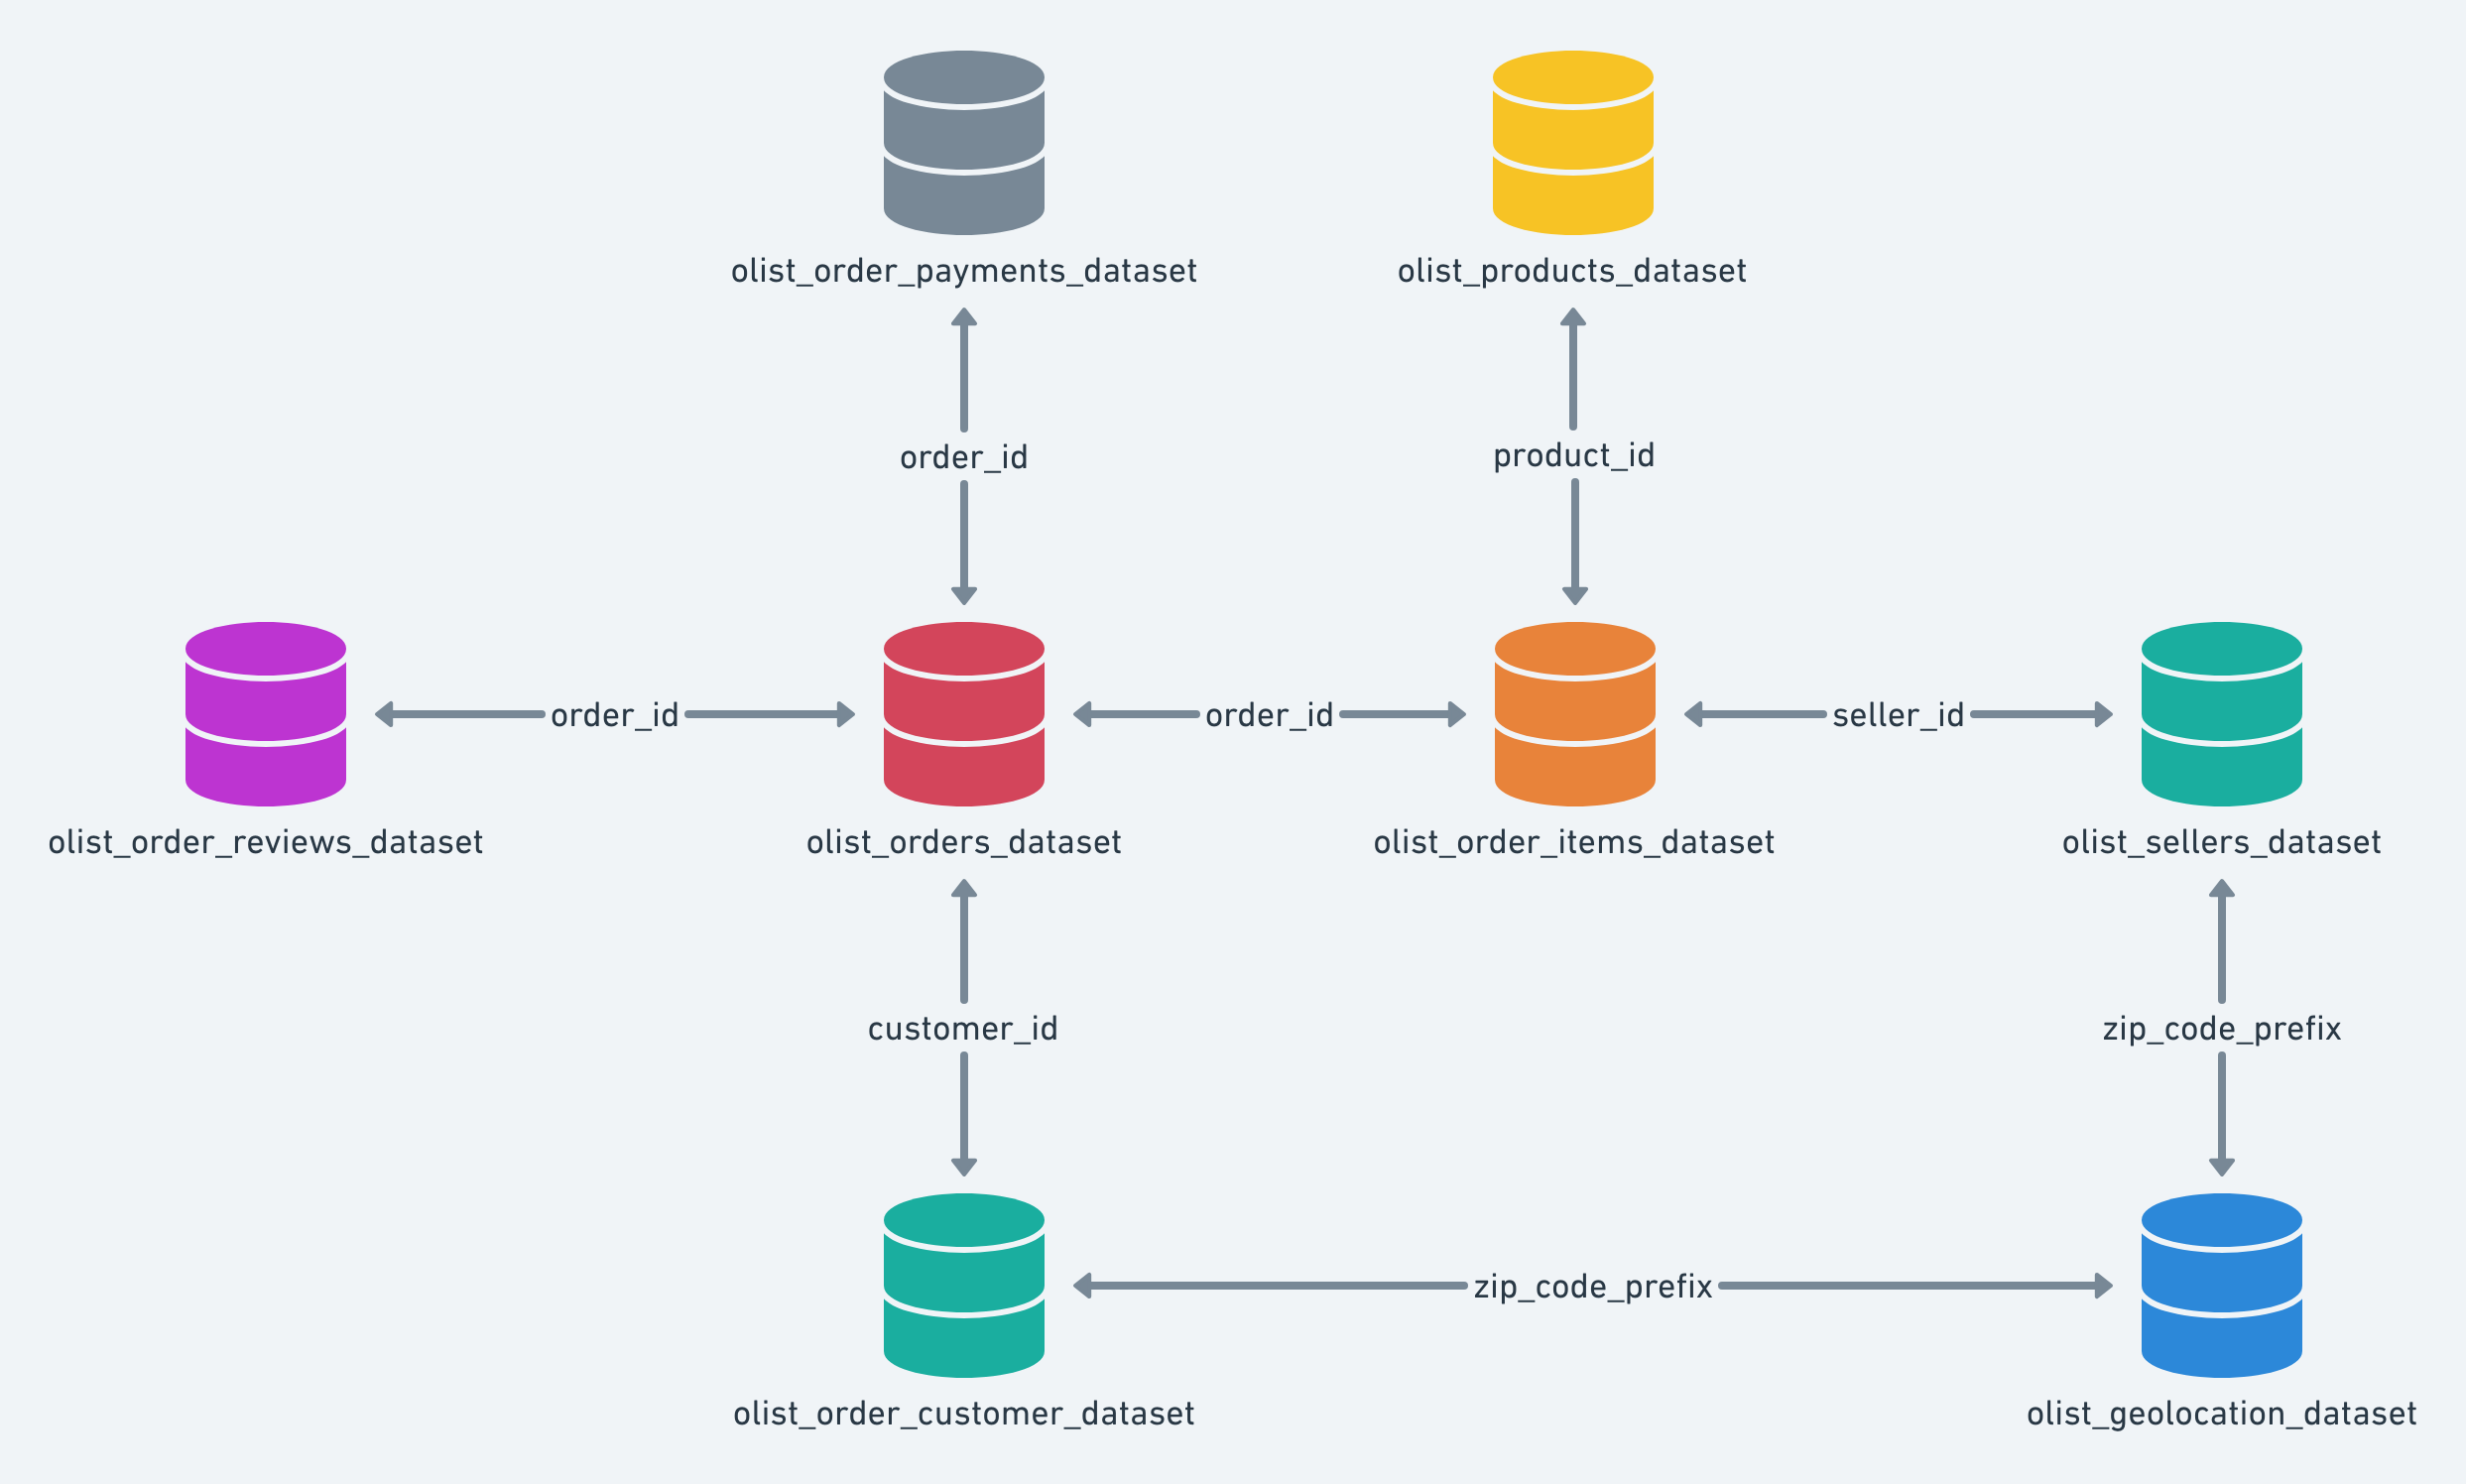

In [636]:
customers_df = pd.read_csv('customers_dataset.csv')
sellers_df = pd.read_csv('sellers_dataset.csv')
products_df = pd.read_csv('products_dataset.csv')
pcnt_df = pd.read_csv('product_category_name_translation.csv')
orders_df = pd.read_csv('orders_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
geolocation_df = pd.read_csv('geolocation_dataset.csv')

**Insight:**
- There are 9 dataframes in the dataset. One about customers, one about sales, two about products, four about orders, and one about geolocation.
- Each dataframe has a primary id column.

### Assessing Data

In [637]:
datasets = {'customers': customers_df,
            'sellers': sellers_df,
            'products': products_df,
            'pcnt': pcnt_df,
            'orders': orders_df,
            'order_items': order_items_df,
            'order_payments': order_payments_df,
            'order_reviews': order_reviews_df}

In [638]:
print('Display information of each dataframe...\n')
for i, (name, df) in enumerate(datasets.items()):
    print(f'{i+1}. {name}')
    df.info()
    print()
print('Completed.')

Display information of each dataframe...

1. customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

2. sellers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            30

In [639]:
print('Checking duplicate rows of each dataframe...\n')
for i, (name, df) in enumerate(datasets.items()):
    duplicate_count = df.duplicated().sum()
    print(f'{i+1}. {name}: {duplicate_count}')
    if duplicate_count > 0:
        df.drop_duplicates(inplace=True)
        df.reset_index(inplace=True, drop=True)
print('\nCompleted.')

Checking duplicate rows of each dataframe...

1. customers: 0
2. sellers: 0
3. products: 0
4. pcnt: 0
5. orders: 0
6. order_items: 0
7. order_payments: 0
8. order_reviews: 0

Completed.


In [640]:
datasets = {'customers': customers_df,
            'sellers': sellers_df,
            'products': products_df,
            'pcnt': pcnt_df,
            'orders': orders_df,
            'order_items': order_items_df,
            'order_payments': order_payments_df,
            'order_reviews': order_reviews_df}

print('Checking missing values of each dataframe...\n')
for i, (name, df) in enumerate(datasets.items()):
    print(f'{i+1}. {name}')
    print(df.isna().sum())
    print()
print('Completed.')

Checking missing values of each dataframe...

1. customers
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

2. sellers
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

3. products
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

4. pcnt
product_category_name            0
product_category_name_english    0
dtype: int64

5. orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_

**Insight:**
- There is no duplicate data in each dataframe.
- There are missing values in products, orders, and order reviews dataframe.

### Cleaning Data

#### Cleaning `products_df`

In [641]:
products_df[products_df.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [642]:
products_df = products_df.fillna({'product_category_name': 'other',
                                  'product_name_lenght': products_df['product_name_lenght'].median(),
                                  'product_description_lenght': products_df['product_description_lenght'].median(),
                                  'product_weight_g': products_df['product_weight_g'].median(),
                                  'product_length_cm': products_df['product_length_cm'].median(),
                                  'product_height_cm': products_df['product_height_cm'].median(),
                                  'product_width_cm': products_df['product_width_cm'].median()})

products_df.rename({
    'product_description_lenght': 'product_description_length',
    'product_name_lenght': 'product_name_length'
}, axis=1, inplace=True)

#### Cleaning `orders_df`

In [643]:
orders_df[orders_df.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [644]:
orders_df.dropna(inplace=True)

#### Cleaning `order_reviews_df`

In [645]:
order_reviews_df[order_reviews_df.isna().any(axis=1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [646]:
order_reviews_df = order_reviews_df.fillna({'review_comment_title': 'no review title',
                                            'review_comment_message': 'no review message'})

**Insight:**
- In `products_df`, missing values on `product_category_name` (string columns) have been replaced by `other`, while missing values on numerical columns have been replaced by its median.
- In `orders_df`, because missing values occur on datetime columns, we decided to remove it.
- In `order_reviews_df`, because most of the rows contain missing values in `review_comment_title` and `review_comment_message`, we decided to replace it with `no review title` and `no review message` respectively, so that we doesn't lose a lot of data

## Exploratory Data Analysis (EDA)

### Merging Dataframes

In [647]:
products_new_df = pd.merge(left = products_df, right = pcnt_df, how = "left",
                           left_on = "product_category_name", right_on = "product_category_name")

In [648]:
order_items_new_df = pd.merge(left = order_items_df, right = products_new_df, how = "left",
                             left_on = "product_id", right_on = "product_id")
order_items_new_df = pd.merge(left = order_items_new_df, right = sellers_df, how = "left",
                             left_on = "seller_id", right_on = "seller_id")

In [649]:
orders_new_df = pd.merge(left = orders_df, right = customers_df, how = "left",
                         left_on = "customer_id", right_on = "customer_id")
orders_new_df = pd.merge(left = orders_new_df, right = order_items_new_df, how = "left",
                         left_on = "order_id", right_on = "order_id")
orders_new_df = pd.merge(left = orders_new_df, right = order_payments_df, how = "left",
                         left_on = "order_id", right_on = "order_id")
orders_new_df = pd.merge(left = orders_new_df, right = order_reviews_df, how = "left",
                         left_on = "order_id", right_on = "order_id")

In [650]:
all_df = orders_new_df.copy()
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115706 entries, 0 to 115705
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115706 non-null  object 
 1   customer_id                    115706 non-null  object 
 2   order_status                   115706 non-null  object 
 3   order_purchase_timestamp       115706 non-null  object 
 4   order_approved_at              115706 non-null  object 
 5   order_delivered_carrier_date   115706 non-null  object 
 6   order_delivered_customer_date  115706 non-null  object 
 7   order_estimated_delivery_date  115706 non-null  object 
 8   customer_unique_id             115706 non-null  object 
 9   customer_zip_code_prefix       115706 non-null  int64  
 10  customer_city                  115706 non-null  object 
 11  customer_state                 115706 non-null  object 
 12  order_item_id                 

In [651]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no review title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,no review title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,no review title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no review title,no review message,2018-08-18 00:00:00,2018-08-22 19:07:58


### Cleaning Data (Part 2)

In [652]:
all_df['product_category_name_english'] = all_df.apply(lambda x: 'other' if x['product_category_name'] == 'other' else x['product_category_name_english'], axis=1)
all_df[all_df['product_category_name'] == 'other'][['product_category_name', 'product_category_name_english']]

,product_category_name,product_category_name_english
126,other,other
215,other,other
268,other,other
309,other,other
381,other,other
...,...,...
115272,other,other
115444,other,other
115451,other,other
115457,other,other


In [653]:
all_df[['product_category_name', 'product_category_name_english']].head(10)

,product_category_name,product_category_name_english
0,utilidades_domesticas,housewares
1,utilidades_domesticas,housewares
2,utilidades_domesticas,housewares
3,perfumaria,perfumery
4,automotivo,auto
5,pet_shop,pet_shop
6,papelaria,stationery
7,automotivo,auto
8,automotivo,auto
9,moveis_decoracao,furniture_decor


In [654]:
all_df.dropna(inplace=True)

In [655]:
string_columns = ['order_status', 'customer_city', 'customer_state', 'product_category_name',
                  'product_category_name_english', 'seller_city', 'seller_state', 'payment_type',
                  'review_comment_title', 'review_comment_message']

for column in string_columns:
    all_df[column] = all_df[column].apply(lambda x: x.lower())

for column in string_columns:
    print(f'Unique values in {column}:')
    print(all_df[column].value_counts())
    print()

Unique values in order_status:
order_status
delivered    113187
canceled          7
Name: count, dtype: int64

Unique values in customer_city:
customer_city
sao paulo                 17871
rio de janeiro             7785
belo horizonte             3140
brasilia                   2382
curitiba                   1767
                          ...  
morro do pilar                1
capistrano                    1
miravania                     1
santa rita da floresta        1
nova vicosa                   1
Name: count, Length: 4071, dtype: int64

Unique values in customer_state:
customer_state
sp    47812
rj    14566
mg    13216
rs     6311
pr     5790
sc     4143
ba     3844
df     2397
go     2305
es     2268
pe     1795
ce     1480
mt     1060
pa     1056
ms      837
ma      807
pb      605
rn      553
pi      541
al      438
se      382
to      329
ro      274
am      167
ac       92
ap       82
rr       44
Name: count, dtype: int64

Unique values in product_category_name:
product_cat

In [656]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date',
                'shipping_limit_date' ,'review_creation_date', 'review_answer_timestamp']

for column in date_columns:
    all_df[column] = pd.to_datetime(all_df[column])

all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113194 entries, 0 to 115705
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113194 non-null  object        
 1   customer_id                    113194 non-null  object        
 2   order_status                   113194 non-null  object        
 3   order_purchase_timestamp       113194 non-null  datetime64[ns]
 4   order_approved_at              113194 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113194 non-null  datetime64[ns]
 6   order_delivered_customer_date  113194 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113194 non-null  datetime64[ns]
 8   customer_unique_id             113194 non-null  object        
 9   customer_zip_code_prefix       113194 non-null  int64         
 10  customer_city                  113194 non-null  object        
 11  custo

In [657]:
all_df['order_purchase_date'] = all_df['order_purchase_timestamp'].dt.date
all_df['order_purchase_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')
all_df['order_purchase_year'] = all_df['order_purchase_timestamp'].dt.to_period('Y')

In [658]:
all_df.sort_values(['order_purchase_timestamp', 'order_id', 'order_item_id'], ascending=True, inplace=True)
all_df.reset_index(inplace=True, drop=True)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_purchase_date,order_purchase_month,order_purchase_year
0,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,32ea3bdedab835c3aa6cb68ce66565ef,4106,...,45.46,9fe0f66724df77fd63fcc0c94a323978,4.0,no review title,facilidade em manusear o aparelho.,2016-10-26,2016-10-30 21:32:15,2016-10-03,2016-10,2016
1,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,2f64e403852e6893ae37485d5fcacdaf,98280,...,39.09,dc62f1e20d7f280e54066b6a92841086,4.0,no review title,tudo certo...,2016-10-28,2016-10-29 11:29:53,2016-10-03,2016-10,2016
2,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,b8b8726af116a5cfb35b0315ecef9172,22770,...,35.61,f9fe37d91c506b29a0b4d9107f667bde,1.0,no review title,"o produto foi comprado em 10/10/2016, não cheg...",2016-11-09,2016-11-09 21:04:42,2016-10-03,2016-10,2016
3,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,61db744d2f835035a5625b59350c6b63,90040,...,53.73,657654f17abc5a7ce8290f148efb3dd3,3.0,no review title,no review message,2016-11-04,2016-11-04 23:45:17,2016-10-03,2016-10,2016
4,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,8d3a54507421dbd2ce0a1d58046826e0,13185,...,133.46,444d04d7ca0131b3b40619f81d0facd5,1.0,no review title,"boa tarde o produto veio correto, porem a entr...",2016-11-01,2016-11-02 16:52:00,2016-10-03,2016-10,2016


In [659]:
all_df['delivery_time'] = all_df.apply(lambda x: (x['order_delivered_customer_date'] - x['order_purchase_timestamp']).total_seconds() / (3600*24), axis=1)
all_df['delivery_time_estimate'] = all_df.apply(lambda x: (x['order_estimated_delivery_date'] - x['order_purchase_timestamp']).total_seconds() / (3600*24), axis=1)
all_df['delivery_time_lag'] = all_df.apply(lambda x: (x['delivery_time'] - x['delivery_time_estimate']), axis=1)

In [660]:
all_df.duplicated().sum()

0

### Explore Customers Data

In [766]:
all_df.groupby('customer_unique_id')['customer_id'].nunique().sort_values(ascending=False).reset_index()

,customer_unique_id,customer_id
0,8d50f5eadf50201ccdcedfb9e2ac8455,14
1,3e43e6105506432c953e165fb2acf44c,9
2,ca77025e7201e3b30c44b472ff346268,7
3,6469f99c1f9dfae7733b25662e7f1782,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
91461,564bc02acd888f7617b0d7c737d35aee,1
91462,564b79621999c67280ca3374ab6e5f93,1
91463,564b4b783f120f23b3a67f4004524b45,1
91464,564ab8ca31faaf89e0ce856cfd7472a6,1


In [767]:
all_df.groupby('customer_id')['order_id'].nunique().sort_values(ascending=False).reset_index()

,customer_id,order_id
0,00012a2ce6f8dcda20d059ce98491703,1
1,aa5e341090958e5111abe3ba75bcfe87,1
2,aa625e70d5e95d9b5c2c24e78fa0d75c,1
3,aa6190994371836fc1d4596edd827abd,1
4,aa606152f23a5fa9ba3d0b87f7a492e8,1
...,...,...
94467,55770885623f29be5cca70c94523333b,1
94468,557680a586ced70b6898cbe01a35c87d,1
94469,55761211ed951c99bab19617dad3e33b,1
94470,5575494798cac6f28d4da41aa44b44c8,1


In [768]:
customer_by_state_df = all_df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False).reset_index()
customer_by_state_df.head()

,customer_state,customer_unique_id
0,sp,38416
1,rj,11621
2,mg,10778
3,rs,5073
4,pr,4682


In [769]:
customer_by_city_df = all_df.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False).reset_index()
customer_by_city_df.head()

,customer_city,customer_unique_id
0,sao paulo,14216
1,rio de janeiro,6200
2,belo horizonte,2546
3,brasilia,1975
4,curitiba,1412


### Explore Sellers Data

In [770]:
seller_by_state_df = all_df.groupby('seller_state')['seller_id'].nunique().sort_values(ascending=False).reset_index()
seller_by_state_df.head(5)

,seller_state,seller_id
0,sp,1731
1,pr,329
2,mg,226
3,sc,180
4,rj,161


In [771]:
seller_by_city_df = all_df.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False).reset_index()
seller_by_city_df.head(5)

,seller_city,seller_id
0,sao paulo,647
1,curitiba,120
2,rio de janeiro,90
3,belo horizonte,62
4,ribeirao preto,49


### Explore Products Data

In [772]:
product_by_category_df = all_df.groupby('product_category_name_english')['product_id'].nunique().sort_values(ascending=False).reset_index()
product_by_category_df.head(5)

,product_category_name_english,product_id
0,bed_bath_table,2971
1,sports_leisure,2809
2,furniture_decor,2574
3,health_beauty,2390
4,housewares,2275


In [773]:
size_by_category_df = all_df.groupby('product_category_name_english').agg({
    'product_weight_g': 'mean',
    'product_length_cm': 'mean',
    'product_height_cm': 'mean',
    'product_width_cm': 'mean'
}).reset_index()
size_by_category_df.head()

,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,agro_industry_and_commerce,4312.089431,30.853659,26.674797,22.808943
1,air_conditioning,4089.349481,38.615917,21.328720,26.245675
2,art,1530.604878,49.873171,7.760976,36.956098
3,arts_and_craftmanship,1369.875000,30.916667,10.916667,21.541667
4,audio,1210.458667,19.928000,9.474667,15.384000


### Explore Orders Data

In [669]:
order_by_status_df = all_df.groupby('order_status').agg({
    'order_id': 'nunique'
})
order_by_status_df.head()

,order_id
order_status,
canceled,6
delivered,94466


In [670]:
item_by_order_df = all_df.groupby('order_id').agg({
    'order_item_id': 'nunique'
}).sort_values('order_item_id', ascending=False)
item_by_order_df.head()

,order_item_id
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
73c8ab38f07dc94389065f7eba4f297a,14


In [671]:
order_by_payment_df = all_df.groupby('payment_type').agg({
    'order_id': 'nunique'
}).sort_values('order_id', ascending=False)
order_by_payment_df.head()

,order_id
payment_type,
credit_card,72768
boleto,18792
voucher,3594
debit_card,1448


In [672]:
order_by_review_df = all_df.groupby('review_score').agg({
    'order_id': 'nunique'
}).sort_values('order_id', ascending=False)
order_by_review_df.head()

,order_id
review_score,
5.0,56041
4.0,18659
1.0,9209
3.0,7855
2.0,2894


In [673]:
order_by_month_df = all_df.groupby('order_purchase_month').agg({
    'order_id': 'nunique'
})
order_by_month_df.head()

,order_id
order_purchase_month,
2016-10,265
2016-12,1
2017-01,729
2017-02,1582
2017-03,2478


In [674]:
order_by_date_df = all_df.groupby('order_purchase_date').agg({
    'order_id': 'nunique'
})
order_by_date_df.head()

,order_id
order_purchase_date,
2016-10-03,8
2016-10-04,53
2016-10-05,34
2016-10-06,41
2016-10-07,38


### Explore Merged Data

In [774]:
all_df_unique_order_item = all_df.drop_duplicates(subset=['order_id', 'order_item_id'])
daily_order_df = all_df_unique_order_item.resample(rule='D', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
}).reset_index()
daily_order_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue",
    "order_purchase_timestamp": "order_date"
}, inplace=True)

daily_order_df.head()

,order_date,order_count,revenue
0,2016-10-03,8,463.48
1,2016-10-04,53,8545.90
2,2016-10-05,34,6149.87
3,2016-10-06,41,5889.96
4,2016-10-07,38,5825.27


In [724]:
monthly_order_df =  all_df_unique_order_item.resample(rule='MS', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_order_df.index = monthly_order_df.index.strftime('%Y-%m')
monthly_order_df = monthly_order_df.reset_index()
monthly_order_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue",
    "order_purchase_timestamp": "order_date"
}, inplace=True)

monthly_order_df.head()

,order_date,order_count,revenue
0,2016-10,265,40178.56
1,2016-11,0,0.00
2,2016-12,1,10.90
3,2017-01,729,108970.47
4,2017-02,1582,222979.36


In [775]:
order_by_product_category_df = all_df.groupby('product_category_name')['order_id'].nunique().sort_values(ascending=False).reset_index()
order_by_product_category_df

,product_category_name,order_id
0,cama_mesa_banho,9176
1,beleza_saude,8602
2,esporte_lazer,7484
3,informatica_acessorios,6498
4,moveis_decoracao,6256
...,...,...
66,artes_e_artesanato,23
67,cds_dvds_musicais,12
68,la_cuisine,12
69,fashion_roupa_infanto_juvenil,7


In [761]:
sum_order_item_category_df = all_df_unique_order_item.groupby('product_category_name_english').agg({
    'order_item_id': 'count'
}).reset_index()
sum_order_item_category_df

,product_category_name_english,order_item_id
0,agro_industry_and_commerce,206
1,air_conditioning,284
2,art,195
3,arts_and_craftmanship,24
4,audio,358
...,...,...
66,stationery,2451
67,tablets_printing_image,81
68,telephony,4402
69,toys,3999


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Demografi Penjual dan Pelanggan pada E-Commerce?

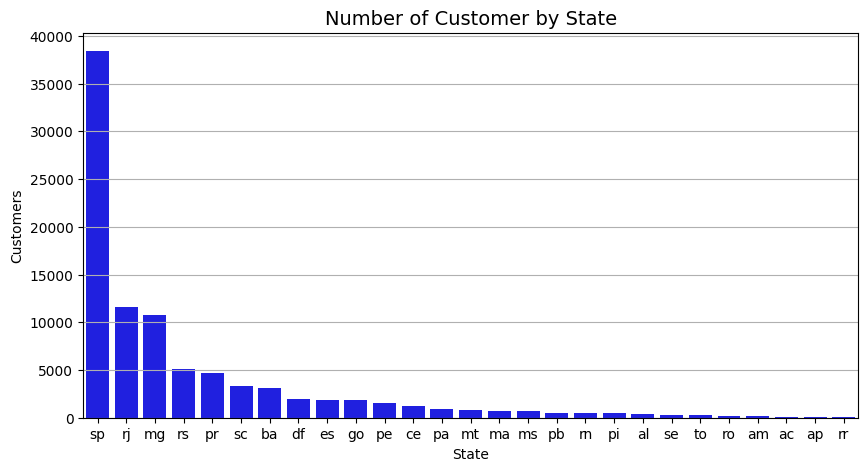

In [835]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="customer_state",
    y="customer_unique_id",
    data=customer_by_state_df.sort_values(by='customer_unique_id', ascending=False),
    color='blue'
)
plt.title("Number of Customer by State", loc="center", fontsize=14)
plt.xlabel('State')
plt.ylabel('Customers')
plt.grid(axis='y')
plt.show()

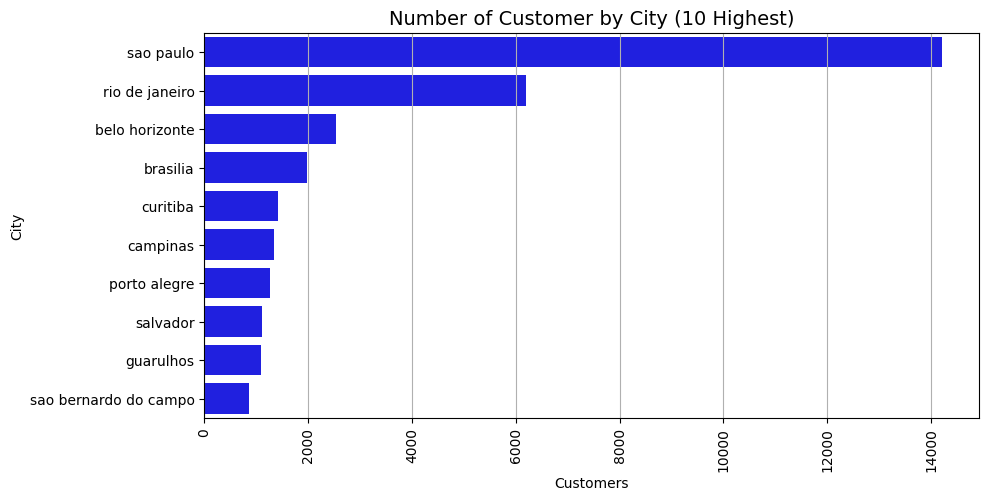

In [846]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="customer_unique_id",
    y="customer_city",
    data=customer_by_city_df.sort_values(by='customer_unique_id', ascending=False)[:10],
    color='blue',
    orient='horizontal'
)
plt.title("Number of Customer by City (10 Highest)", loc="center", fontsize=14)
plt.xlabel('Customers')
plt.ylabel('City')
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.show()

### Pertanyaan 2: Bagaimana Performa Penjualan dan Revenue pada Setiap Bulan?

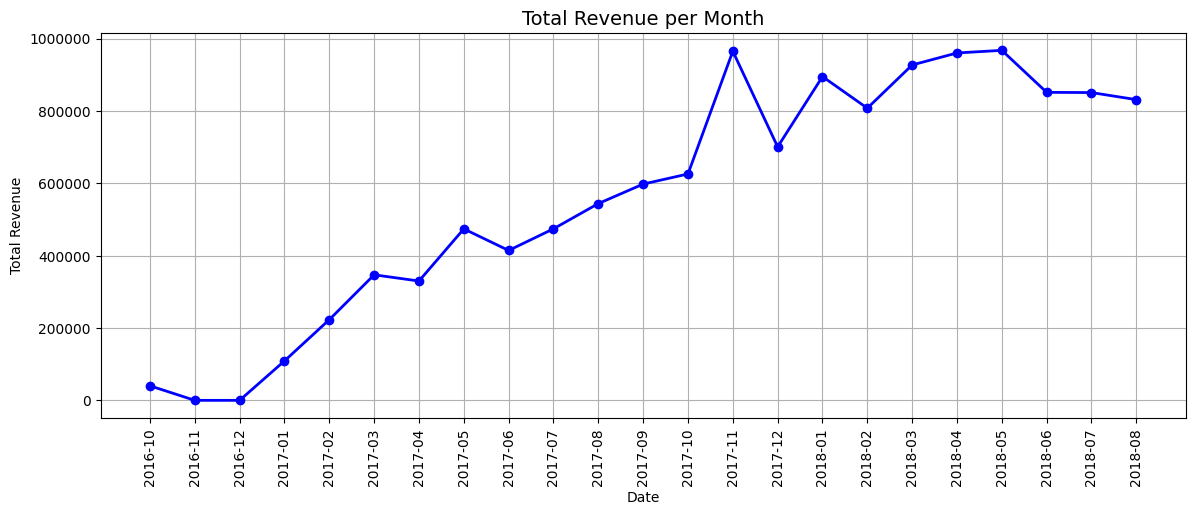

In [756]:
plt.figure(figsize=(14, 5))
plt.plot(
    monthly_order_df["order_date"],
    monthly_order_df["revenue"],
    marker='o',
    linewidth=2,
    color='blue'
)
plt.title("Total Revenue per Month", loc="center", fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.show()

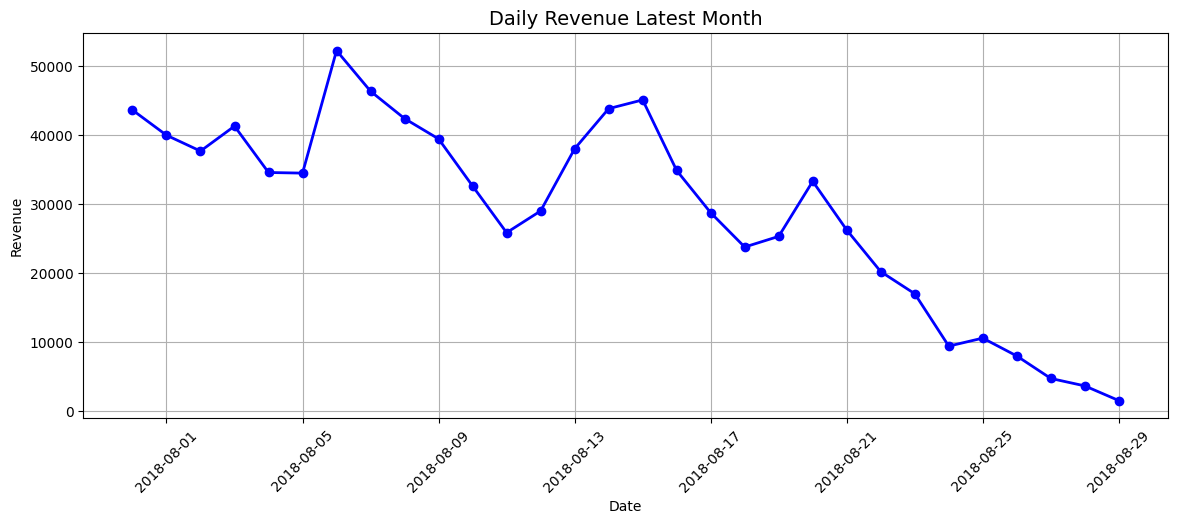

In [760]:
plt.figure(figsize=(14, 5))
plt.plot(
    daily_order_df["order_date"][-30:],
    daily_order_df["revenue"][-30:],
    marker='o',
    linewidth=2,
    color='blue'
)
plt.title("Daily Revenue Latest Month", loc="center", fontsize=14)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.show()

### Pertanyaan 3: Kategori Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

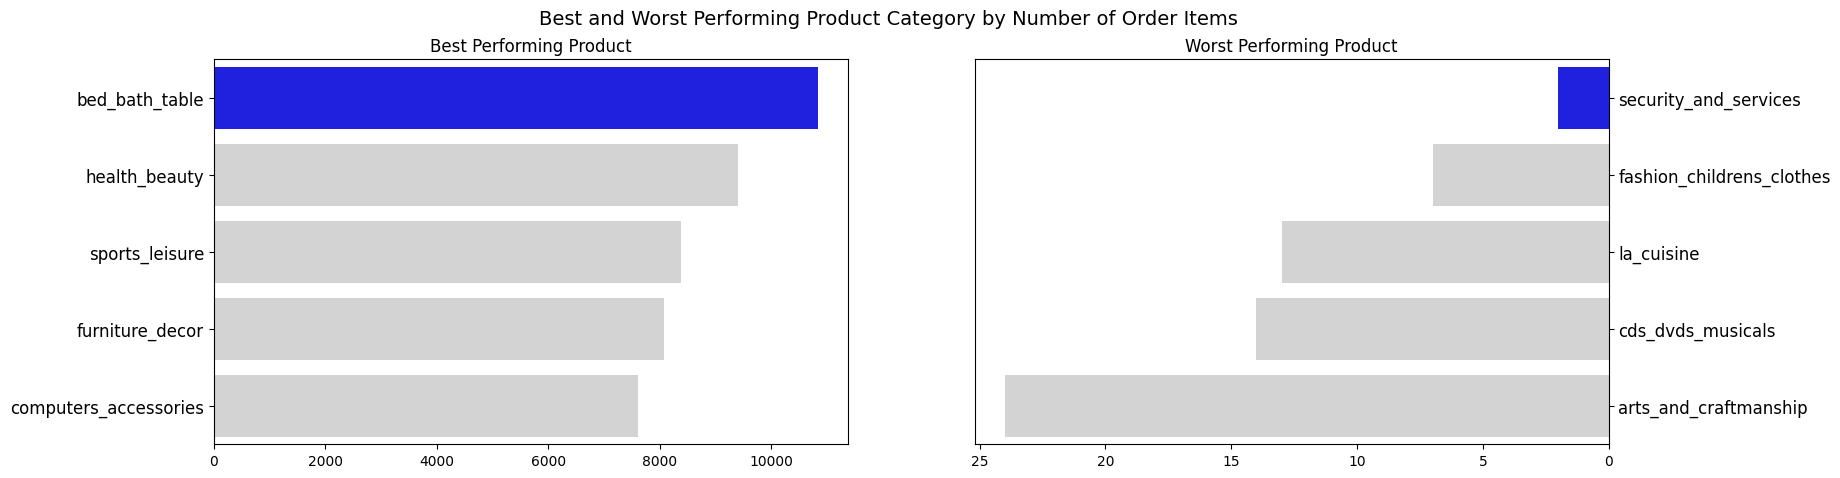

In [795]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

colors = ["blue", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(data=sum_order_item_category_df.sort_values(by='order_item_id', ascending=False).head(5), x="order_item_id", y="product_category_name_english", palette=colors, ax=ax[0])
# plt.bar(x='product_category_name_english', height='order_item_id', data=sum_order_item_category_df.sort_values(by='order_item_id', ascending=True).head(5))
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=12)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(data=sum_order_item_category_df.sort_values(by='order_item_id', ascending=True).head(5), x="order_item_id", y="product_category_name_english", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=12)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product Category by Number of Order Items", fontsize=14)
plt.show()

### Pertanyaan 4: Bagaimana Distribusi Waktu Lama Pengiriman Produk Sejak Dipesan?

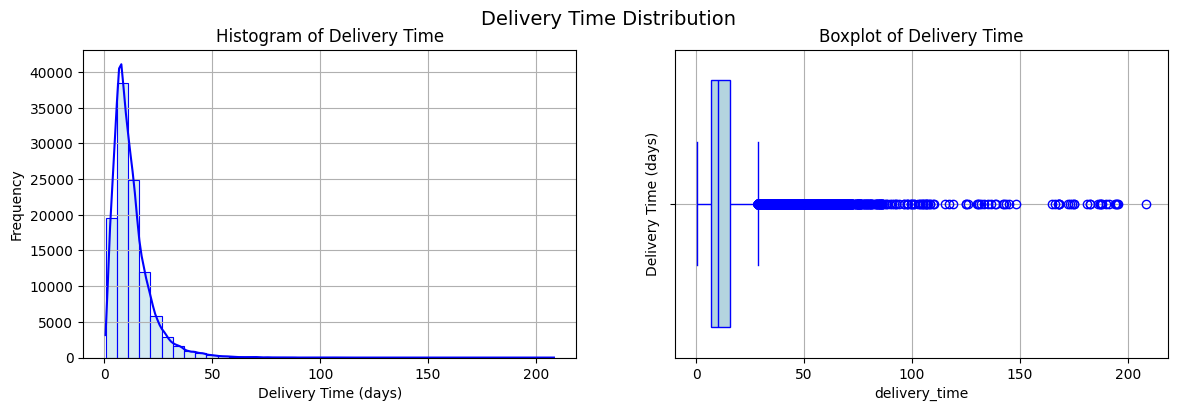

In [832]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.histplot(ax=ax[0], data=all_df_unique_order_item, x="delivery_time", edgecolor='blue', color='lightblue', bins=40, kde=True)
ax[0].lines[0].set_color('blue')
ax[0].set_xlabel('Delivery Time (days)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Delivery Time')
ax[0].grid()

sns.boxplot(ax=ax[1], data=all_df_unique_order_item, x='delivery_time', linecolor='blue', color='lightblue')
ax[1].set_ylabel('Delivery Time (days)')
ax[1].set_title('Boxplot of Delivery Time')
ax[1].grid('y')

plt.suptitle('Delivery Time Distribution', fontsize=14)
plt.show()

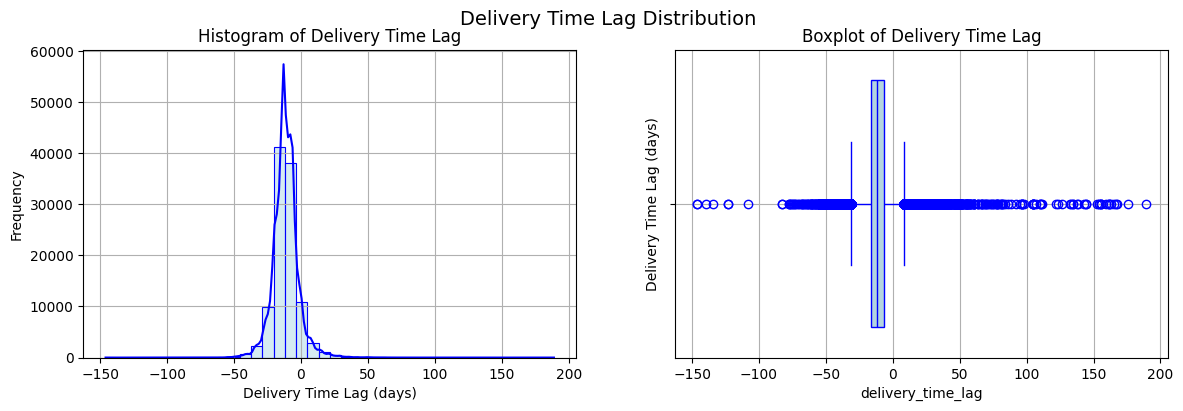

In [831]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.histplot(ax=ax[0], data=all_df_unique_order_item, x="delivery_time_lag", edgecolor='blue', color='lightblue', bins=40, kde=True)
ax[0].lines[0].set_color('blue')
ax[0].set_xlabel('Delivery Time Lag (days)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Delivery Time Lag')
ax[0].grid()

sns.boxplot(ax=ax[1], data=all_df_unique_order_item, x='delivery_time_lag', linecolor='blue', color='lightblue')
ax[1].set_ylabel('Delivery Time Lag (days)')
ax[1].set_title('Boxplot of Delivery Time Lag')
ax[1].grid('y')

plt.suptitle('Delivery Time Lag Distribution', fontsize=14)
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [684]:
rfm_df = all_df_unique_order_item.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_uid", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"]
recent_date = all_df["order_purchase_timestamp"].max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).total_seconds() / 3600)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head()

,customer_uid,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,2668.069444
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,2739.819444
2,0000f46a3911fa3c0805444483337064,1,69.00,12881.926111
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,7698.515556
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,6907.248611


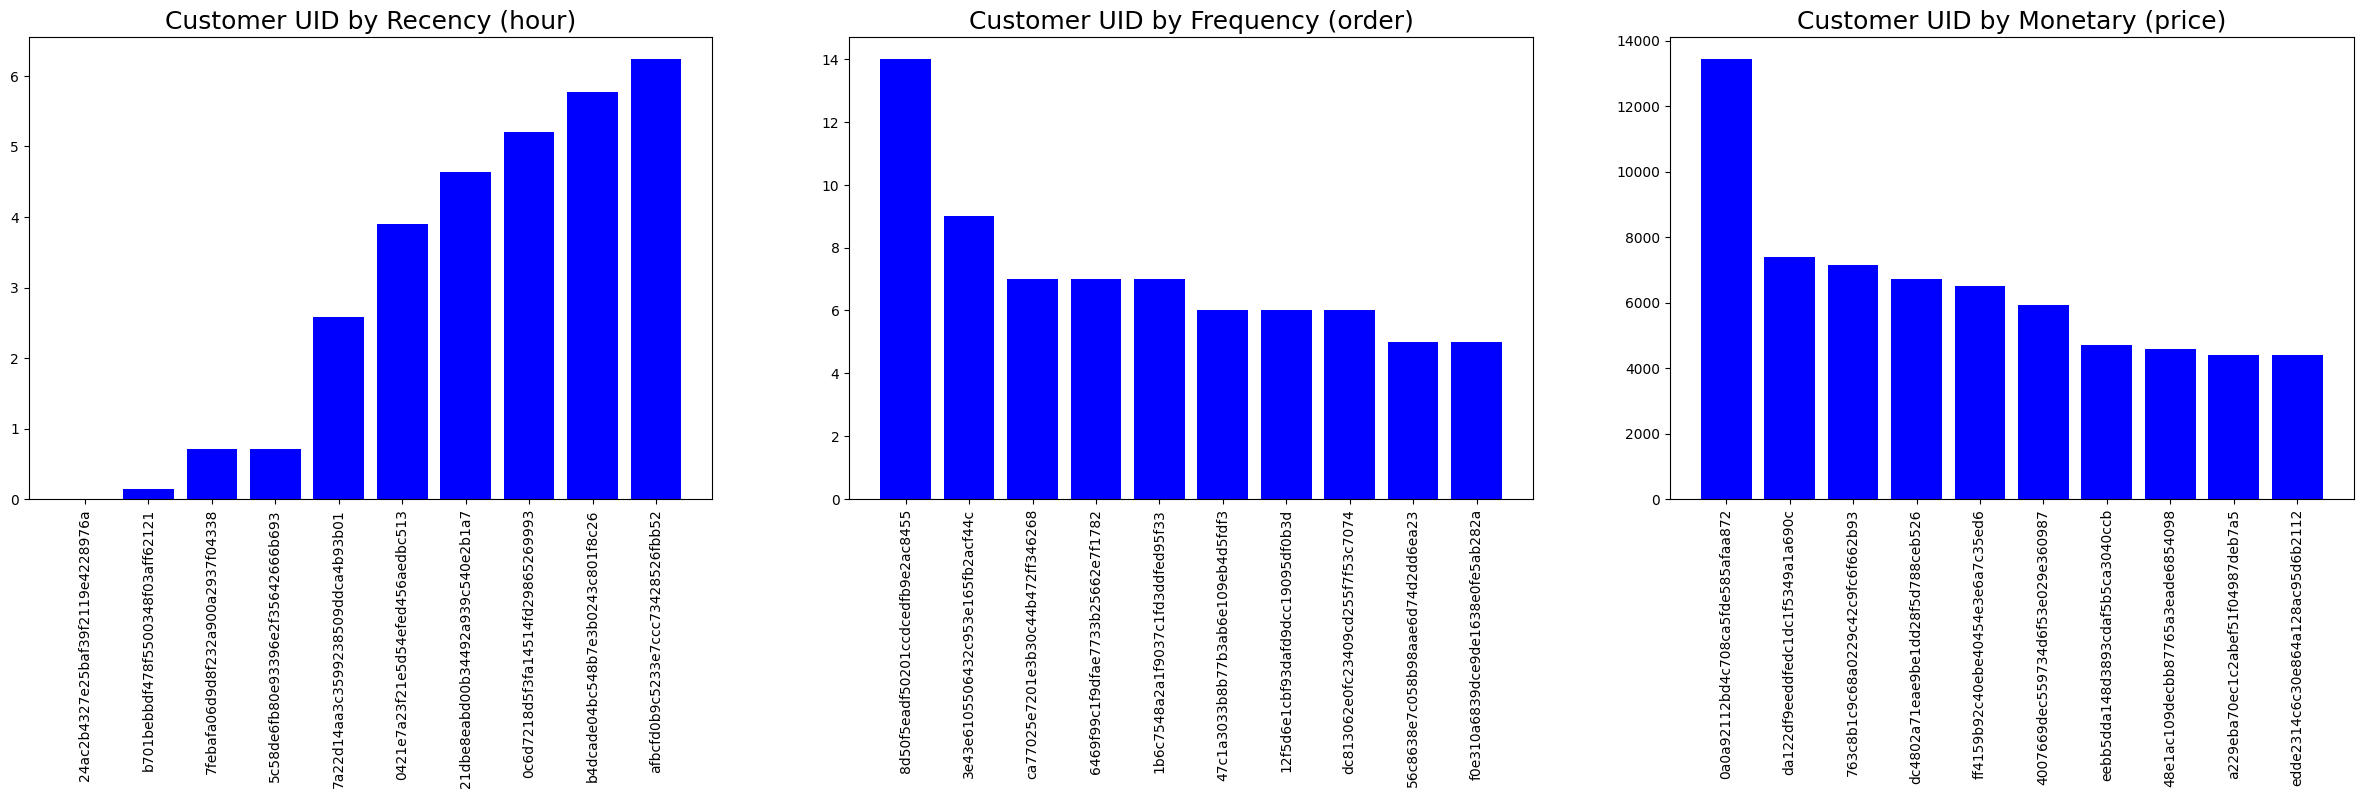

In [847]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4" for i in range(10)]
recency_df = rfm_df.sort_values(by="recency", ascending=True).head(10)
frequency_df = rfm_df.sort_values(by="frequency", ascending=False).head(10)
monetary_df = rfm_df.sort_values(by="monetary", ascending=False).head(10)

ax[0].bar('customer_uid', 'recency', data=recency_df, color='blue')
ax[0].tick_params(axis='x', labelrotation = 90)
ax[0].set_title("Customer UID by Recency (hour)", loc="center", fontsize=18)

ax[1].bar('customer_uid', 'frequency', data=frequency_df, color='blue')
ax[1].tick_params(axis='x', labelrotation = 90)
ax[1].set_title("Customer UID by Frequency (order)", loc="center", fontsize=18)

ax[2].bar('customer_uid', 'monetary', data=monetary_df, color='blue')
ax[2].tick_params(axis='x', labelrotation = 90)
ax[2].set_title("Customer UID by Monetary (price)", loc="center", fontsize=18)

plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2